https://www.kaggle.com/code/parsasam/reinforcement-learning-notes-multi-armed-bandits

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
k = 10
num_problems = 2000

q_star = np.random.normal(0, 1, (num_problems,k))
arms = [0] * k

for i in range(10):
    arms[i] = np.random.normal(q_star[0, i], 1, 2000) # first problem as a sample


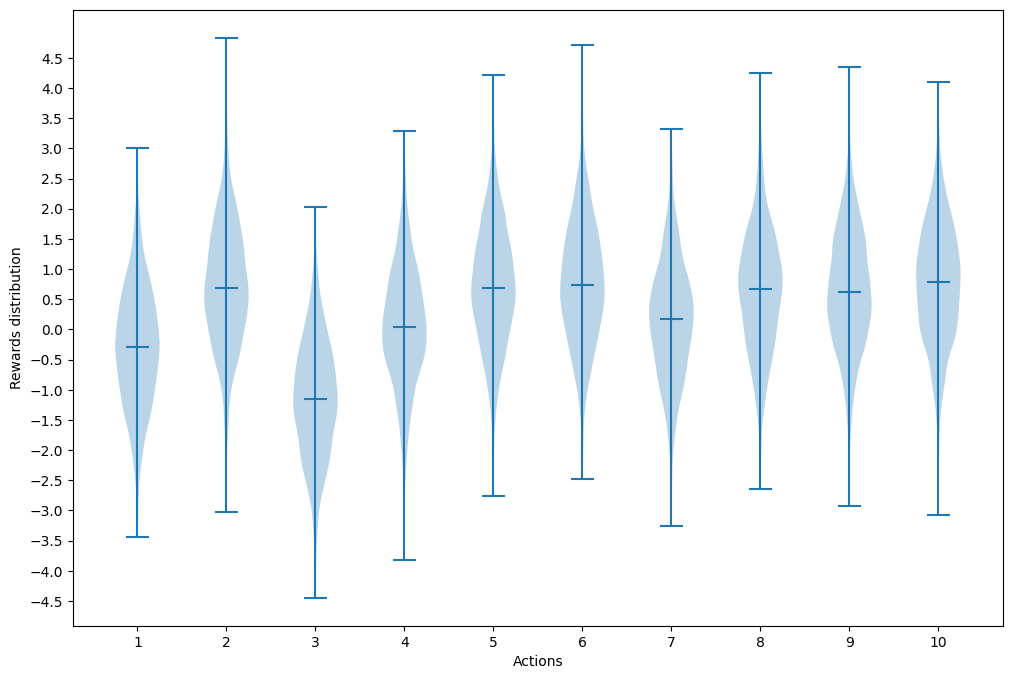

In [ ]:
plt.figure(figsize=(12,8))
plt.ylabel('Rewards distribution')
plt.xlabel('Actions')
plt.xticks(range(1,11))
plt.yticks(np.arange(-5,5,0.5))

plt.violinplot(arms, positions=range(1,11), showmedians=True)
plt.show()

In [ ]:
def bandit(action, problem):
    return np.random.normal(q_star[problem, action], 1)

In [ ]:
def simple_max(Q, N, t):
#     return np.argmax(Q)
    return np.random.choice(np.flatnonzero(Q == Q.max())) # breaking ties randomly

In [ ]:
'''
def simple_bandit(k, epsilon, steps, initial_Q, alpha=0, argmax_func=simple_max):
    #READ THE ALGORITHM CAREFULLY AND WRITE THE CODE HERE
    # Step:1  Initialization: Create arrays to track rewards and optimal action counts, both starting at zero; repeat the following for each problem.
    # Step:2 Set up problem: Initialize estimated values for all actions to the starting value and action counts to zero; identify the best possible action.
    # Step:3 Exploration: Randomly choose an action with a probability determined by the exploration rate.
    # Step:4 Exploitation: Choose the action with the highest estimated value if not exploring.
    # Step:5 Simulate reward: Execute the chosen action and receive the corresponding reward from the bandit.
    # Step:6 Update action counts: Increase the count of times the chosen action has been selected.
    # Step:7 Update estimated values: Adjust the estimated value for the chosen action based on the new reward.
    # Step:8 Track performance: Add the reward to the total rewards for that step and increment the count of optimal actions if the best action was chosen.
    # Step:9 Compute averages: After all problems, calculate the average rewards and average optimal action counts across all problems.

    return np.divide(rewards,num_problems), np.divide(actions,num_problems)
'''
def simple_bandit(k, epsilon, steps, initial_Q, alpha=0, argmax_func=simple_max):
    rewards = np.zeros(steps)
    actions = np.zeros(steps)
    for problem in range(num_problems):
        Q = np.full(k, initial_Q)
        N = np.zeros(k)  # action counts
        for t in range(steps):
            if np.random.rand() < epsilon:
                action = np.random.choice(k)  # exploration
            else:
                action = argmax_func(Q, N, t)  # exploitation

            reward = bandit(action, problem)
            rewards[t] += reward
            actions[t] += (action == np.argmax(q_star[problem]))  # track optimal action

            N[action] += 1
            Q[action] += alpha * (reward - Q[action])  # Update Q

    return np.divide(rewards, num_problems), np.divide(actions, num_problems)


In [ ]:
ep_0, ac_0 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=0)
ep_01, ac_01 = simple_bandit(k=10, epsilon=0.01, steps=1000, initial_Q=0)
ep_1, ac_1 = simple_bandit(k=10, epsilon=0.1, steps=1000, initial_Q=0)

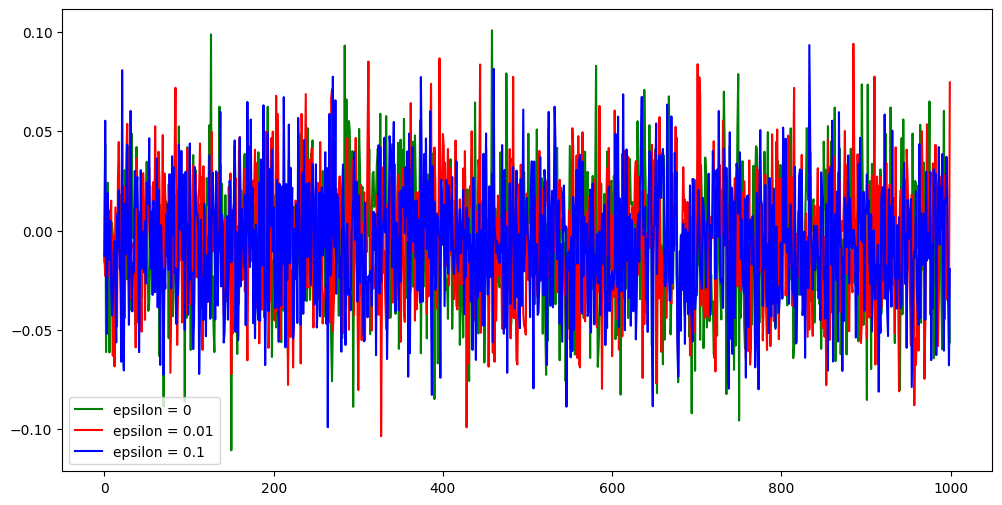

In [ ]:

plt.figure(figsize=(12,6))
plt.plot(ep_0, 'g', label='epsilon = 0')
plt.plot(ep_01, 'r', label='epsilon = 0.01')
plt.plot(ep_1, 'b', label='epsilon = 0.1')
plt.legend()
plt.show()

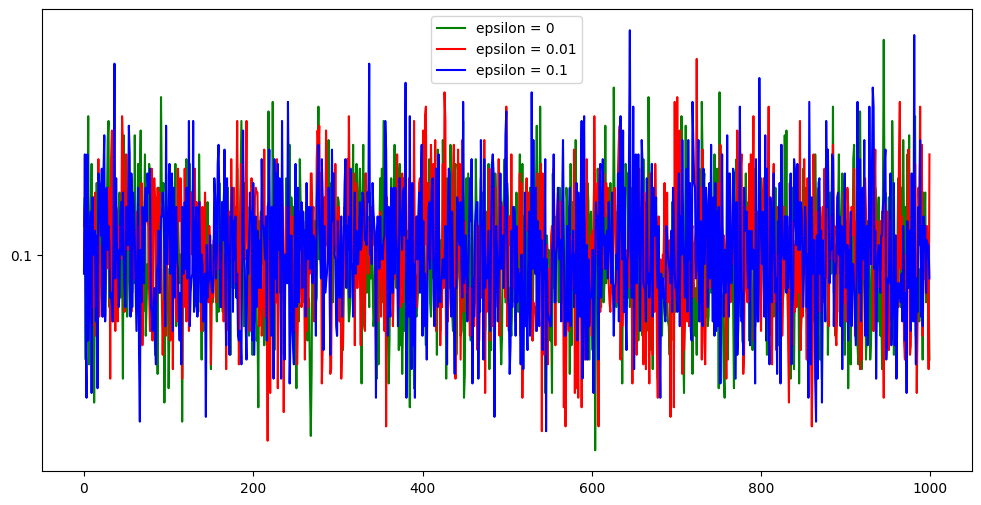

In [ ]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,1,0.1))
plt.plot(ac_0, 'g', label='epsilon = 0')
plt.plot(ac_01, 'r', label='epsilon = 0.01')
plt.plot(ac_1, 'b', label='epsilon = 0.1')
plt.legend()
plt.show()

In [ ]:
opt_0, ac_opt_0 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=5, alpha=0.2)


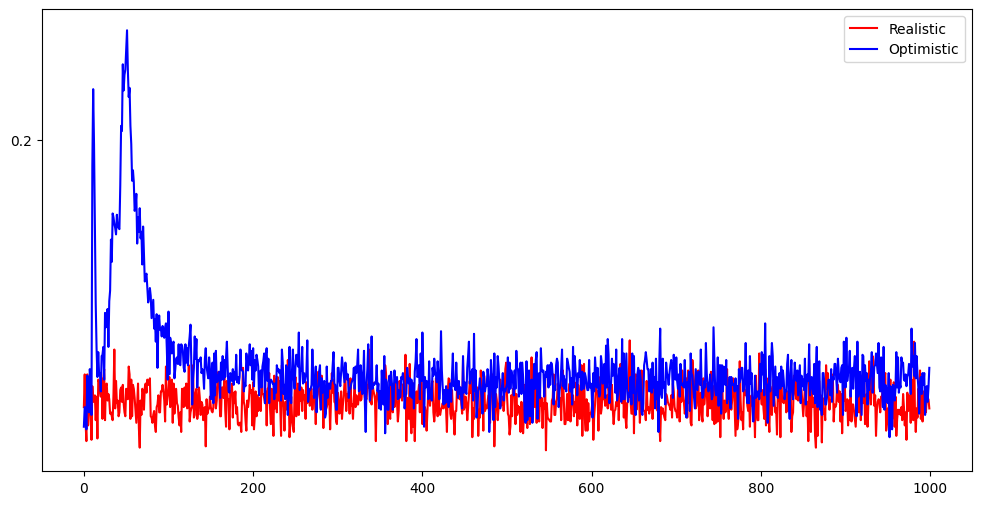

In [ ]:
plt.figure(figsize=(12,6))
plt.yticks(np.arange(0,3,0.2))
plt.plot(ac_1, 'r', label='Realistic')
plt.plot(ac_opt_0, 'b', label='Optimistic')
plt.legend()
plt.show()

In [ ]:
import numpy as np

def ucb(Q, N, t, c=2):
    # Step 1: Set exploration constant
    # c is the exploration constant, balancing exploration and exploitation

    # Step 2: Handle unvisited actions: If any action has not been selected yet, select it
    unvisited_actions = np.where(N == 0)[0]
    if len(unvisited_actions) > 0:
        return np.random.choice(unvisited_actions)  # Randomly pick one of the unvisited actions

    # Step 3: Compute confidence bounds
    confidence_bounds = Q + c * np.sqrt(np.log(t + 1) / (N + 1e-5))  # Avoid division by zero

    # Step 4: Select best action: action with highest confidence bound
    return np.argmax(confidence_bounds)  # Breaking ties randomly by selecting argmax


In [ ]:
ucb_2, ac_ucb_2 = simple_bandit(k=10, epsilon=0, steps=1000, initial_Q=0, argmax_func=ucb)

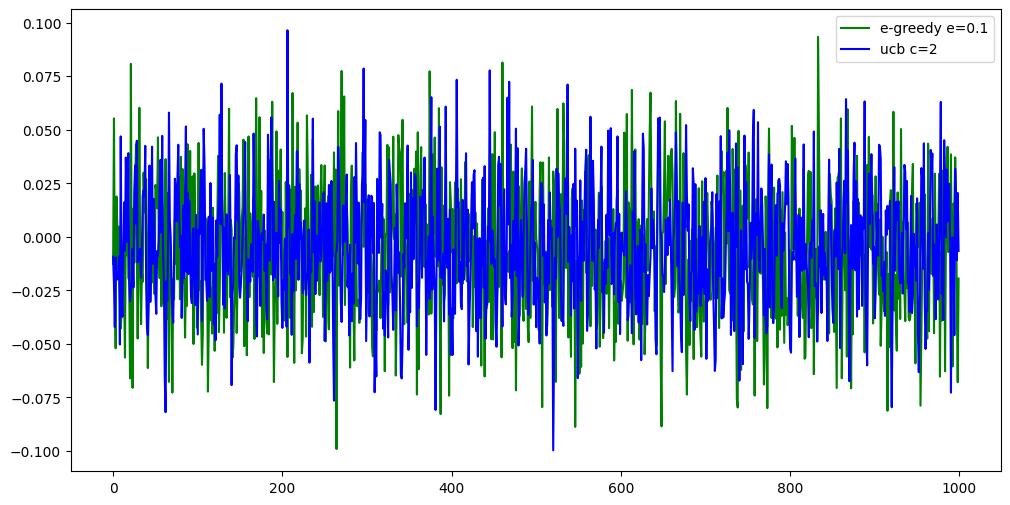

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(ep_1, 'g', label='e-greedy e=0.1')
plt.plot(ucb_2, 'b', label='ucb c=2')
plt.legend()
plt.show()

In [ ]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    M = e_x / e_x.sum()
    return np.argmax(M), M

In [ ]:
'''
def gradient_bandit(k, steps, alpha, initial_Q, is_baseline=True):
   #READ THE ALGORITHM CAREFULLY AND WRITE THE CODE HERE
    #Step: 1 Initialize arrays: Create arrays for rewards, optimal actions, action preferences, and estimated values, all set to initial values.
    #Step: 2 Set up problem: For each problem, reset preferences, estimated values, and the baseline; identify the best action.
    #Step: 3 Select action: Use the softmax policy to calculate probabilities and randomly pick an action.
    #Step: 4 Simulate reward: Execute the chosen action and receive a reward from the environment.
    #Step: 5 Update action values: Adjust the estimated value for the chosen action based on the reward.
    #Step: 6 Update preferences: Increase the preference for the chosen action and decrease preferences for others based on their probabilities.
    #Step: 7 Update baseline: If enabled, update the baseline reward estimate for the chosen action.
    #Step: 8 Track performance: Add the reward to the cumulative rewards and increment optimal action counts if the best action was selected.
    #Step: 9 Compute averages: Calculate average rewards and optimal action counts over all problems.

    return np.divide(rewards,num_problems), np.divide(actions,num_problems)
'''
def gradient_bandit(k, steps, alpha, initial_Q, is_baseline=True):
    rewards = np.zeros(steps)
    actions = np.zeros(steps)
    preferences = np.zeros(k)  # action preferences
    baseline = 0

    for problem in range(num_problems):
        preferences.fill(0)
        baseline = 0
        for t in range(steps):
            # Softmax policy
            action, probs = softmax(preferences)
            reward = bandit(action, problem)
            rewards[t] += reward

            if action == np.argmax(q_star[problem]):
                actions[t] += 1

            if is_baseline:
                baseline = np.mean(rewards[:t+1])

            # Update preferences
            preferences[action] += alpha * (reward - baseline) * (1 - probs[action])
            preferences -= alpha * (reward - baseline) * probs

    return np.divide(rewards, num_problems), np.divide(actions, num_problems)


In [ ]:
sft_4, ac_sft_4 = gradient_bandit(k=10, steps=1000, alpha=0.4, initial_Q=0, is_baseline=False)
sft_4_baseline, ac_sft_4_baseline = gradient_bandit(k=10, steps=1000, alpha=0.4, initial_Q=0, is_baseline=True)

In [ ]:
sft_1, ac_sft_1 = gradient_bandit(k=10, steps=1000, alpha=0.1, initial_Q=0, is_baseline=False)
sft_1_baseline, ac_sft_1_baseline = gradient_bandit(k=10, steps=1000, alpha=0.1, initial_Q=0, is_baseline=True)

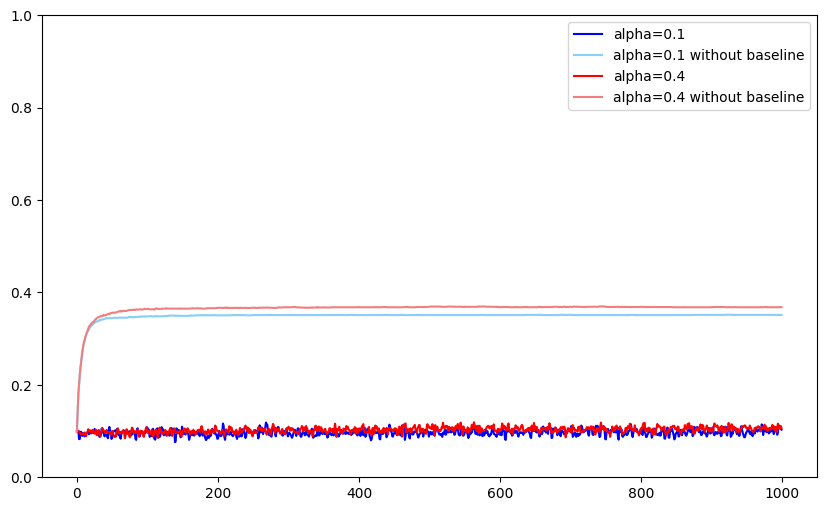

In [ ]:
plt.figure(figsize=(10,6))
plt.ylim([0,1])
plt.plot(ac_sft_4_baseline, 'b', label='alpha=0.1')
plt.plot(ac_sft_4, 'lightskyblue', label='alpha=0.1 without baseline')
plt.plot(ac_sft_1_baseline, 'r', label='alpha=0.4')
plt.plot(ac_sft_1, 'lightcoral', label='alpha=0.4 without baseline')
plt.legend()
plt.show()